In [173]:
print("neradovskii")


neradovskii


In [174]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt
# импортируем библиотеку для базовых математических расчетов
import math

In [175]:
# Размеры образца, которые нам понадобятся позднее
b0 = 20 # ширина образца по ISO 6892-1:2019
L0 = 80 # начальная длина образца по ISO 6892-1:2019
a0 = 1.5 # тольщина образца по исходным данным

In [176]:
stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе

# открываем файл с данными
with open ('load_stroke_data.txt', 'r',encoding='utf-8') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split('\t')                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[0]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[1]))               # второе число в список load

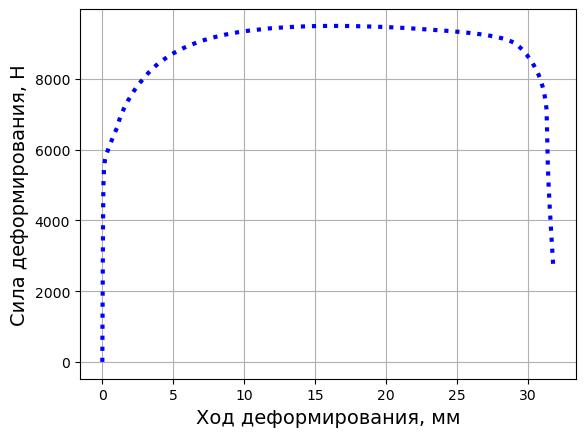

In [177]:
# визуализируем данные с помощью импортированной ранее библиотеки matplotlib

# создаем "базу" для графика
plt.plot (stroke, load, ':', color = 'blue',lw=3)
# Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()


In [178]:
# Расчет инженерного напряжения
A0 = b0*a0 # расчет площади поперечного сечения образца

sigma_eng = [] # пустой список куда будем записывать значения инженерного напряжения
for i in range (0, len(load)):
    sigma_eng.append(load[i]/A0)

In [179]:
# Расчет инженерной деформации
epsilon_eng = [] # пустой список куда будем записывать значения инженерной деформации
for i in range (0, len(stroke)):
    epsilon_eng.append((stroke[i]/L0)*100)

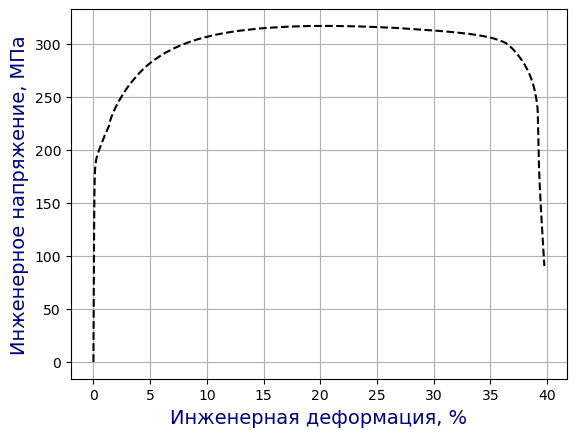

In [180]:
# Визуализируем результаты
# создаем "базу" для графика
plt.plot (epsilon_eng, sigma_eng, '--', color = 'black')
# Добавляем названия осей
plt.xlabel ('Инженерная деформация, %', fontsize = 14,color = 'navy')
plt.ylabel ('Инженерное напряжение, МПа', fontsize = 14,color = 'navy')
# добавляем для красоты сетку
plt.grid()


In [181]:
# Расчет истинного напряжения и деформации
sigma_true = [] # пустой список куда будем записывать значения истинного напряжения
epsilon_true = [] # пустой список куда будем записывать значения истинной деформации
for i in range (0, len(sigma_eng)):
    sigma_true.append(sigma_eng[i]*(1+epsilon_eng[i]/100))
    epsilon_true.append(math.log(1+epsilon_eng[i]/100))

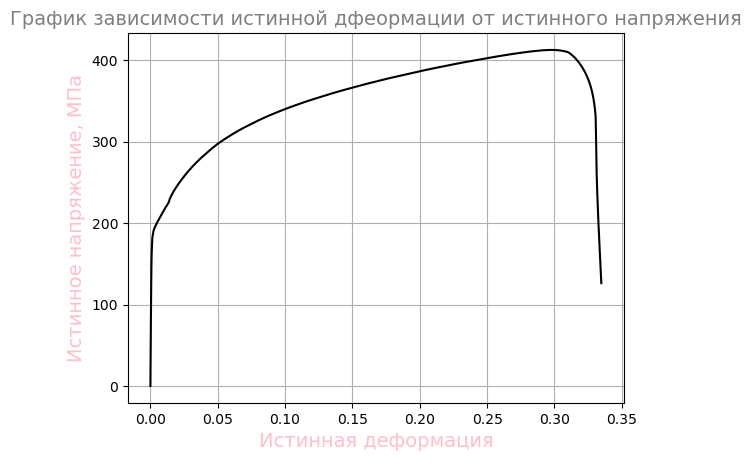

In [182]:
# Визуализируем результаты
# создаем "базу" для график
plt.plot (epsilon_true, sigma_true, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Истинная деформация', fontsize = 14,color='pink')
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14,color='pink')
plt.title('График зависимости истинной дфеормации от истинного напряжения',fontsize = 14,color='grey')
# добавляем для красоты сетку
plt.grid()

In [183]:
# Поиск предла прочности (максимального значения инженерного напряжения)
Rm = 0 # начальное значение переменной, которая будет хранить предел прочности
for i in range (1, len(sigma_eng)):
    if sigma_eng[i] > Rm:
        Rm = sigma_eng[i]
        i_m = i # номер строки в массиве данных, которому соответсвует предел прочности (эта переменная нам понадобится позже)
print (f'Предел прочности Rm = {round(Rm, 3)} МПа, при i = {i_m}')

Предел прочности Rm = 316.736 МПа, при i = 4162


In [184]:
# Расчет равномерного удлинния
E = 210000 # модуль Юнга для стали принято брать 210 000 МПа
Ag = epsilon_eng[i_m] - (Rm/E)*100
print (f'Равномерное удлинение Ag = {round(Ag,3)}%')

Равномерное удлинение Ag = 20.434%


In [185]:
# Сохранение данных истинное напряжение - истинная деформация в текстовый файл
# Имя и путь к файлу
filename = "load_stroke_data.txt"

# Записываем в файл, используя индексы
with open(filename, 'w') as f:              # открываем файл для записи
    for i in range(len(epsilon_true)):      # запускаем цикл от 0 до длины списка epsilon_true 
        eps = epsilon_true[i]               
        sig = sigma_true[i]                 
        f.write(f"{eps}\t{sig}\n")          # построчно записываем значения переменых epsilon_true[i] и sigma_true[i] в файл
                                            # здесь '\t' означает знак табуляции, '\n' - знак перехода на новую строку